In [18]:
import sys

sys.path.append('/home/janek/Studia/POP/venv/lib/python3.7/site-packages')

In [19]:
import seaborn as sns
import pandas as pd

In [20]:
path = '/home/janek/Studia/POP/output.jsonl'

In [21]:
df = pd.read_json(path, lines=True)
parameters = pd.json_normalize(df['parameters'])
df = df.join(parameters)
del df['parameters']

In [22]:
df

,init_cookies,final_cookies,generations,population_number,crossover_probability,selection_type,mutation_type
0,1536,1436,100,50,0.0,1,1
1,1536,485,100,50,0.0,1,2
2,1536,1436,100,50,0.0,2,1
3,1536,517,100,50,0.0,2,2
4,1536,1421,100,50,0.1,1,1
...,...,...,...,...,...,...,...
319,1466,59,1000,200,0.1,2,2
320,1466,312,1000,200,0.3,1,1
321,1466,59,1000,200,0.3,1,2
322,1466,90,1000,200,0.3,2,1


In [43]:
df.selection_type = df.selection_type.map(lambda x: 'Tournament' if x == '1' else 'Roulette')
df.mutation_type = df.mutation_type.map(lambda x: '1 cookie' if x == '1' else 'Random cookies\' number')

/home/janek/Studia/POP/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/janek/Studia/POP/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


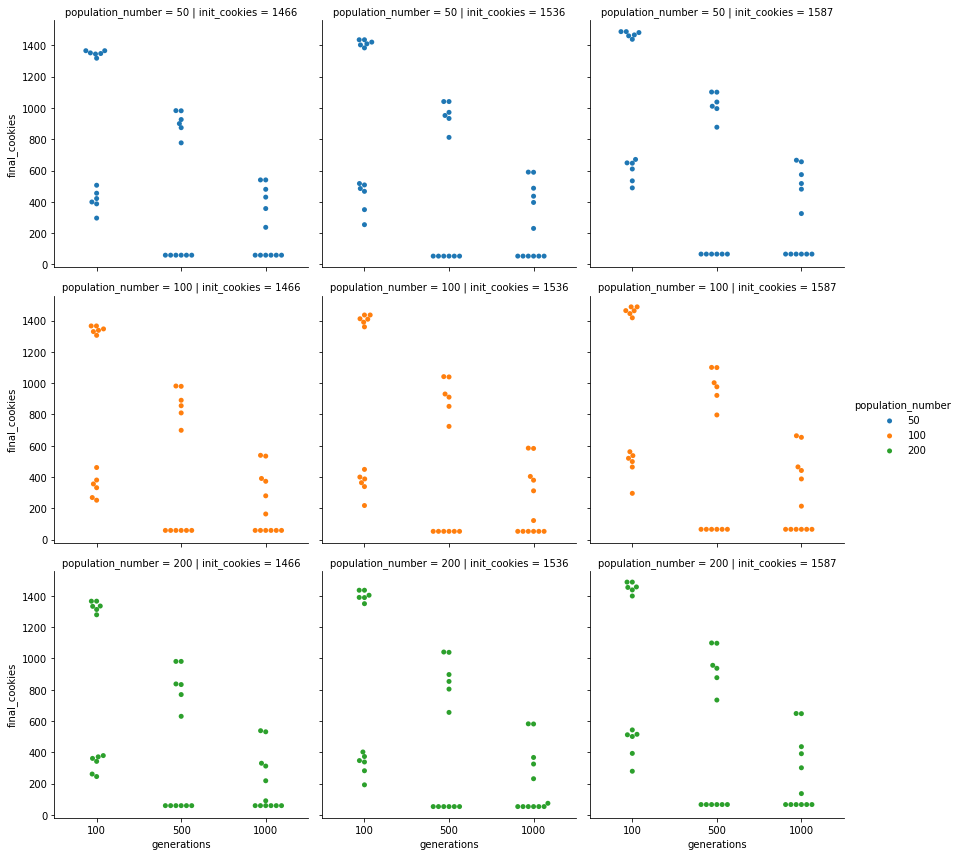

In [59]:
g = sns.FacetGrid(df, col="init_cookies", row="population_number", hue="population_number", size=4)
g.map(sns.swarmplot, "generations", "final_cookies").add_legend()

/home/janek/Studia/POP/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/janek/Studia/POP/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/janek/Studia/POP/venv/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/janek/Studia/POP/venv/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/janek/Studia/POP/venv/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 27.8% of 

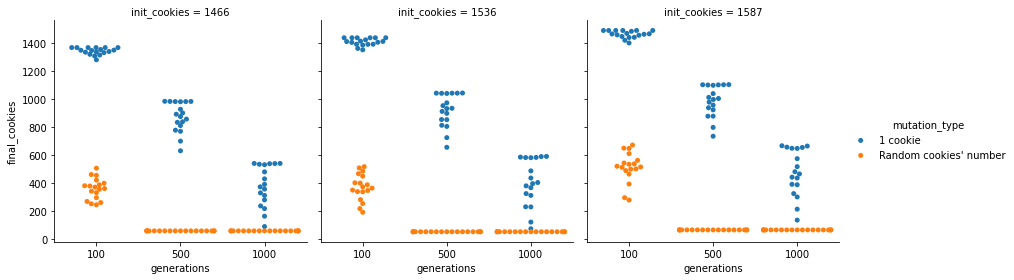

In [51]:
g = sns.FacetGrid(df, col="init_cookies", hue="mutation_type", size=4)
g.map(sns.swarmplot, "generations", "final_cookies").add_legend()

In [76]:
df_with_random_cookies = df[df.mutation_type == 'Random cookies\' number']
df.head()
df[df.crossover_probability = ]

NameError: name 'np' is not defined

/home/janek/Studia/POP/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/janek/Studia/POP/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


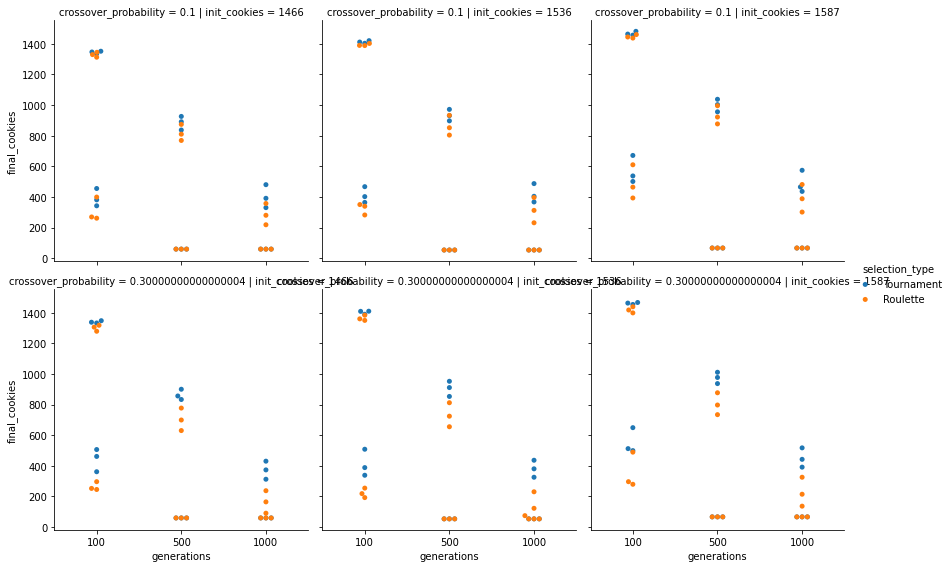

In [80]:
g = sns.FacetGrid(df[df.crossover_probability != 0], col="init_cookies", hue="selection_type", row="crossover_probability", size=4)
g.map(sns.swarmplot, "generations", "final_cookies").add_legend()